<a href="https://colab.research.google.com/github/ekqlsrla/TextBook/blob/main/HandsOn_MachineLearning/Chapter04_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **핸즈온 머신러닝**

---
---

# **Chapter 04 : 모델훈련**

---

## 4.1 선형 회귀

* 선형 회귀 모델의 예측 : $\hat{y} = θ_0 + \theta_1x_1 + ... + \theta_nx_n$
  * 벡터 형태 : $\hat{y} = h_\theta(x) = \theta x$
  

### 1) 정규 방정식

$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$

* $\hat{\theta}$는 비용함수를 최소화하는 $\theta$값
* y는 $y_{1}$ 부터 $y_{m}$까지 포함하는 타깃 벡터


In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3* X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
#정규방정식으로 계산한 값

theta_best

array([[3.51491471],
       [3.35777395]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.51491471],
       [10.23046261]])

(0.0, 2.0, 0.0, 15.0)

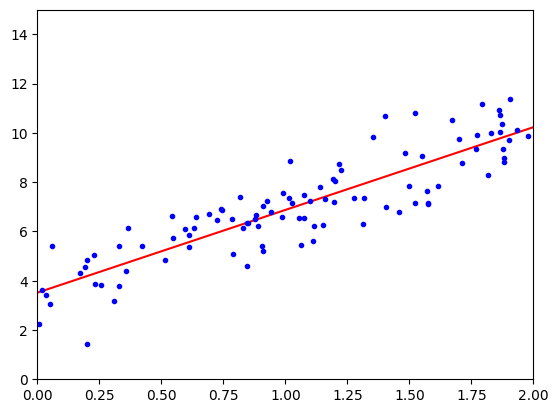

In [5]:
#모델의 예측 그래프

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

In [6]:
#사이킷런에서 선형 회귀 수행

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [7]:
lin_reg.intercept_,lin_reg.coef_

(array([3.51491471]), array([[3.35777395]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.51491471],
       [10.23046261]])

* `LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 함.
* 이 함수는 $\hat{\theta} = X^{+}y$를 계산
  $X^{+}$는 $X$의 유사역행렬

In [9]:
theta_best_svd, residuals, rank,s = np.linalg.lstsq(X_b,y,rcond = 1e-6)
theta_best_svd

array([[3.51491471],
       [3.35777395]])

In [10]:
#유사역행렬 계싼
np.linalg.pinv(X_b).dot(y)

array([[3.51491471],
       [3.35777395]])

### 2) 계산복잡도

* 정규방정식은 역행렬을 계산하는 계산복잡도가 $O(n^{2,4})$에서 $O(n^3)$ 사이 -> 특성 수가 두 배로 늘어나면 계산 시간이 대략 5.3에서 8배로 증가

---
## 4.2 경사 하강법

* Gradient Descent : 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
  * 기본 아이디어 : **비용 함수를 최소화**하기 위해 반복해서 파라미터를 조정해가는

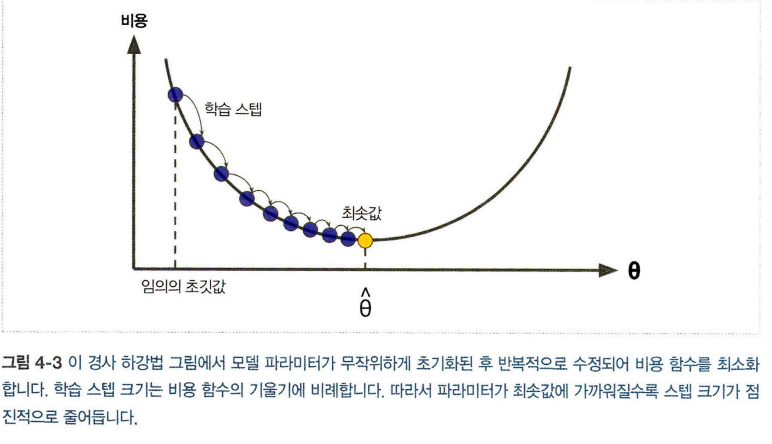

* 경사 하강법에서 가장 중요한 파라미터는 **학습률** 하이퍼 파라미터 -> `너무 작으면 알고리즘에 수렴하기 위해 반복을 많이 진행하고 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 함`

### 1) 배치 경사 하강법

* 편도함수 : $\theta_j$가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산
* 경사하강법의 스텝 : $\theta^{next step} = \theta - \eta \triangledown_\theta MSE(\theta)$

In [11]:
#알고리즘 구현

eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [12]:
theta

array([[3.51491471],
       [3.35777395]])

### 2) 확률적 경사 하강법

: 매 스탭에서 **한 개의 샘플을 무작위로 선택**하고 그 하나의 샘플에 대한 그레이디언트를 계산

* 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름
* 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음
* 배치 경사 하강법보다 훨씬 불안정

In [13]:
n_epochs = 50
t0,t1 = 5,50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t) :
  return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs) :
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients


In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.48467415]), array([3.36726509]))

### 3) 미니배치 경사 하강법

: 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 **미니배치라 부르는 임의의 작은 샘플 세트에대해** 그레이디언트를 계산

|알고리즘|m이 클때|n이 클 때|하이퍼 파라미터 수 | 스케일 조정 필요| 사이킷런|
|---|----|---|---|---|---|
|정규방정식|빠름|느림|0|No|N/A|
|SVD|빠름|느림|느림|0|No|LinearRegression|
|배치 경사 하강법|느림|빠름|2|Yes|SGDRegressor|
|확률적 경사 하강법|빠름|빠름|>=2|Yes|SGDRegressor|
|미니배치 경사 하강법|빠름|빠름|>=2|Yes|SGDRegressor|

---
## 4.3 다항회귀


In [16]:
#간단한 2차방정식으로 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [17]:
#훈련 데이터 변환

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False) #2차 다항
X_poly = poly_features.fit_transform(X)
X[0]

array([1.26678379])

In [18]:
X_poly[0] #원래 특성 X와 이 특성의 제곱 포함

array([1.26678379, 1.60474117])

In [19]:
#Linear Regression 적용

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.21673423]), array([[1.00128638, 0.41342254]]))

* `PolynomialFeatures`가 주어진 차수까지 특성 간의 모든 교차항 추가함

---
## 4.4 학습 곡선

* 학습 곡선을 살펴보면서 모델이 데이터에 과대적합 또는 과소적합 되었는지 확인
* 학습 곡선은 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y) :
  X_train,X_val, y_train,y_val = train_test_split(X,y,test_size = 0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)) :
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = '훈련 세트')
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = '검증 세트')


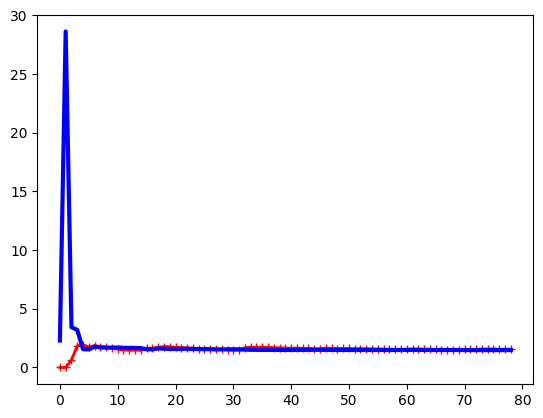

In [21]:
#단순 선형 회귀 모델의 학습 곡선

lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

-> **과소 적합의 전형적인 모습** : 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접

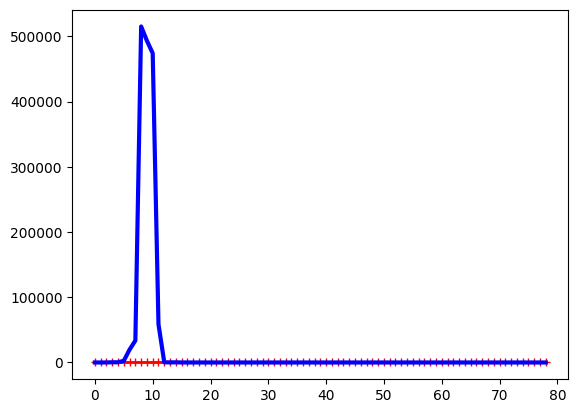

In [22]:
#10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression()),

   ])

plot_learning_curves(polynomial_regression,X,y)

### 1) 편향/분산 트레이드오프

* **편향** | 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우. 편향이 큰 모델은 훈련 데이터에 과소 적합되기 쉬움

* **분산** | 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향

* **줄일 수 없는 오차** | 줄일 수 없는 오차는 데이터 자체에 있는 잡음 때문에 발생. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것

=> 모델의 복잡도가 **커지면** 분산이 **늘어나고** 편향은 **줄어듬**

---

## 4.5 규제가 있는 선형 모델

* 선형 회귀 모델에서는 보통 **모델의 가중치**를 제한함으로써 규제 가함

### 1) 릿지 회귀

* 규제가 추가된 선형 회귀 버전으로 규제항 $\alpha\sum_{i = 1}^{n}\theta_i^2$이 비용함수에 추가됨
* 하이퍼 파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절, 값이 0이면 릿지 회귀는 선형 회귀와 같아짐

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.98952474]])

In [24]:
#확률적 경사 하강법 사용

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])


array([4.97429049])

### 2) 라쏘 회귀

* 라쏘 회귀의 비용 함수 | $J(\theta) = MSE(\theta) + \alpha\sum_{i = 1}^{n}|\theta_i|$

* 덜 중요한 특성의 **가중치를 제거**하려고 함

* 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만듦

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([4.94218957])

### 3) 엘라스틱넷

* 릿지 회귀와 라쏘 회귀를 절충한 모델로 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율$r$을 사용해 조절

  * $r = 0$ 이면 엘라스틱넷은 **릿지회귀**와 같고, $r = 1$이면 **라쏘 회귀**와 같음

  * 규제가 약간 있는 것이 대부분의 경웨 좋으므로 일반적으로 평범한 선형 회귀에는 피하는 것이 낫고, 특성수가 훈련 샘플 수 보다 많거나 특성 몇 개나 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 **라쏘보다는 엘라스틱넷**을 선호

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.94282932])

### 4) 조기 종료

: 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 **검증 에러가 최솟값에 도달하면** 바로 훈련을 중지시키는 것



```
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#warm_start = True로 지정하면 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련 이어감
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                       penalty = None, learning_rate = 'constant', eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000) :
  sgd_reg.fit(X_train_poy_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val,y_val_predict)
  if val_error < minimum_val_error :
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
```



---
## 4.6 로지스틱 회귀

: 샘플이 특정 클래스에 **속할 확률**을 추정하는 데 널리 사용됨

### 1) 확률 추정

* **시그모이드 함수** | 0과 1 사이의 값을 출력하는 함수 $\sigma(t) = \frac{1}{1+exp(-t)}$

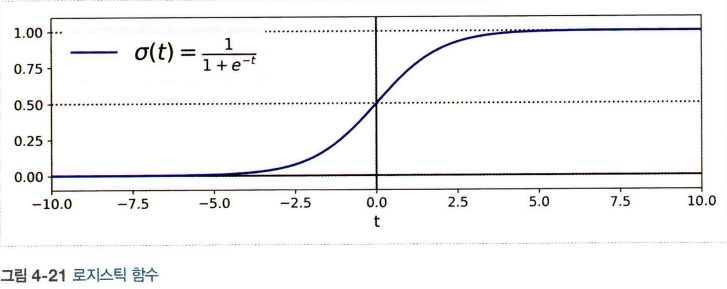

### 2) 훈련과 비용함수

* 훈련의 목적 : 양성샘플(y=1)에 대해서는 높은 확률을 추정하고, 음성샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것

### 3) 결정 경계

In [28]:
# iris data

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
X = iris['data'][:,3:] #꽃잎의 너비
y = (iris['target'] == 2).astype(np.int)

<ipython-input-29-3dd26e8dee3d>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)


In [30]:
#로지스틱 모델 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:1475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


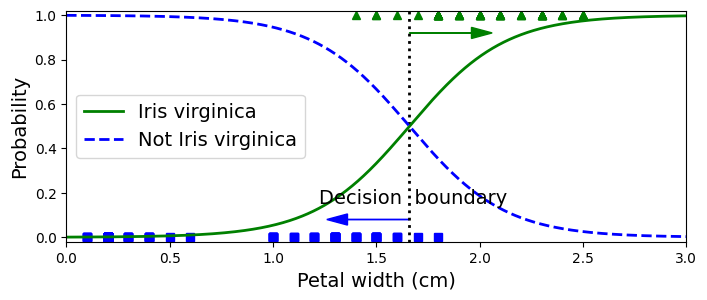

In [31]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4) 소프트 맥스 회귀(다항 로지스틱 회귀)

* 샘플 $x$가 주어지면, 먼저 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정

* 소프트 맥스 함수 | $\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j = 1}^K exp(s_j(x))}$
  * $K$는 클래스 수
  * $s(x)$는 샘플 $x$에 대한 각 클래스의 점수를 담은 벡터
  * $\sigma(s(x))_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률

=> 추정 확률이 가장 높은 클래스를 선택

* **크로스 엔트로피** | 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용

  * `solver = 'lbfgs` : 소프트 맥스 회귀 지원하는 알고리즘
  * `C` : $l_2$ 규제 적용

In [37]:
#multi_class 매개 변수를 'multinomial'로 바꾸면 소프트맥스 회귀를 사용

X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [38]:
#꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃의 품종 확인

softmax_reg.predict([[5,2]])

softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])